In [1]:
import cv2
import numpy as np

# Function to adjust contrast
def adjust_contrast(image, alpha):
    return np.clip(alpha * image, 0, 255).astype(np.uint8)

# Callback function for trackbar (does nothing, just required for trackbar to work)
def nothing(x):
    pass

# Load the image
image = cv2.imread('/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab1/images/im1.jpg')

# Check if image loaded properly
if image is None:
    print("Error: Unable to load image.")
    exit()

# Reshape image to a 2D array of pixels
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria and apply KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5  # Number of clusters
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to uint8 and display colors
centers = np.uint8(centers)

# Create an image to show cluster colors
color_image = np.zeros((100, 600, 3), dtype=np.uint8)
for i in range(k):
    color_image[:, i * 120:(i + 1) * 120] = centers[i]

# Create a window
cv2.namedWindow('Contrast Adjustment')

# Create trackbar to control contrast (alpha value from 1 to 3 with step of 0.01)
cv2.createTrackbar('Contrast', 'Contrast Adjustment', 100, 300, nothing)

# Loop until the user presses 'q' to exit
while True:
    # Get the current trackbar position (scale down to 1.0-3.0)
    alpha = cv2.getTrackbarPos('Contrast', 'Contrast Adjustment') / 100.0
    
    # Adjust the contrast of the original image
    adjusted_image = adjust_contrast(image, alpha)
    
    # Display the adjusted image and color clusters
    cv2.imshow('Contrast Adjustment', adjusted_image)
    cv2.imshow('Color Clusters', color_image)

    # Exit the loop when 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup and close windows
cv2.destroyAllWindows()

2024-10-09 17:04:37.704 python[34219:1194871] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-09 17:04:37.704 python[34219:1194871] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


: 

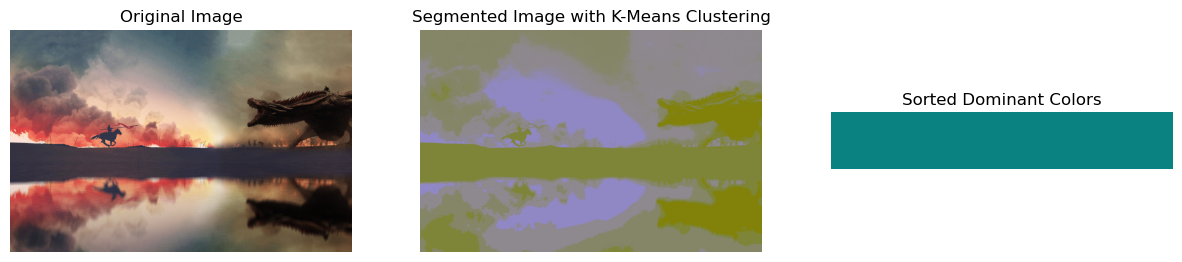

2024-10-09 17:01:35.033 python[34128:1191880] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-09 17:01:35.033 python[34128:1191880] +[IMKInputSession subclass]: chose IMKInputSession_Legacy
2024-10-09 17:01:40.180 python[34128:1191880] not in fullscreen state


: 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to adjust contrast
def adjust_contrast(image, alpha):
    return np.clip(alpha * image, 0, 255).astype(np.uint8)

# Callback function for trackbar (does nothing, just required for trackbar to work)
def nothing(x):
    pass

# Load the image
image = cv2.imread('/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab1/images/im1.jpg')

# Check if image loaded properly
if image is None:
    print("Error: Unable to load image.")
    exit()

# Convert BGR to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Reshape image to a 2D array of pixels
pixel_values = lab_image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria and apply KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5  # Number of clusters
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to uint8 and create a color image to show cluster colors
centers = np.uint8(centers)

# Count pixels in each cluster
labels_count = np.bincount(labels.flatten())

# Combine the centers and counts into a single array
dominant_colors = np.column_stack((centers, labels_count))

# Sort by pixel count (ascending)
sorted_colors = dominant_colors[dominant_colors[:, 3].argsort()]

# Create an image to show the sorted dominant colors
color_image = np.zeros((100, 600, 3), dtype=np.uint8)
total_width = 0

for i in range(len(sorted_colors)):
    width = sorted_colors[i, 3]  # The width based on pixel count
    color_image[:, total_width:total_width + width] = sorted_colors[i, :3]
    total_width += width

# Create a mask for the clustered pixels
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Plot the original, adjusted, and sorted dominant colors
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Segmented Image
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image with K-Means Clustering')
plt.axis('off')

# Sorted Dominant Colors
plt.subplot(1, 3, 3)
plt.imshow(color_image)
plt.title('Sorted Dominant Colors')
plt.axis('off')

plt.show()

# Create a window
cv2.namedWindow('Contrast Adjustment')

# Create trackbar to control contrast (alpha value from 1 to 3 with step of 0.01)
cv2.createTrackbar('Contrast', 'Contrast Adjustment', 100, 300, nothing)

# Loop until the user presses 'q' to exit
while True:
    # Get the current trackbar position (scale down to 1.0-3.0)
    alpha = cv2.getTrackbarPos('Contrast', 'Contrast Adjustment') / 100.0
    
    # Adjust the contrast of the original image
    adjusted_image = adjust_contrast(image, alpha)
    
    # Display the adjusted image and color clusters
    cv2.imshow('Contrast Adjustment', adjusted_image)
    cv2.imshow('Sorted Dominant Colors', color_image)

    # Exit the loop when 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup and close windows
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to adjust contrast
def adjust_contrast(image, alpha):
    return np.clip(alpha * image, 0, 255).astype(np.uint8)

# Callback function for trackbar (does nothing, just required for trackbar to work)
def nothing(x):
    pass

# Load the image
image = cv2.imread('/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab1/images/im1.jpg')

# Check if image loaded properly
if image is None:
    print("Error: Unable to load image.")
    exit()

# Convert BGR to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Reshape image to a 2D array of pixels
pixel_values = lab_image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria and apply KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5  # Number of clusters
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to uint8 and create a color image to show cluster colors
centers = np.uint8(centers)

# Create an image to show cluster colors
color_image = np.zeros((100, 600, 3), dtype=np.uint8)
for i in range(k):
    color_image[:, i * 120:(i + 1) * 120] = centers[i]

# Create a mask for the clustered pixels
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Plot the original, adjusted, and segmented images
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Adjusted Image (showing contrast adjustment)
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image with K-Means Clustering')
plt.axis('off')

# Cluster Colors
plt.subplot(1, 3, 3)
plt.imshow(color_image)
plt.title('Cluster Colors')
plt.axis('off')

plt.show()

# Create a window
cv2.namedWindow('Contrast Adjustment')

# Create trackbar to control contrast (alpha value from 1 to 3 with step of 0.01)
cv2.createTrackbar('Contrast', 'Contrast Adjustment', 100, 300, nothing)

# Loop until the user presses 'q' to exit
while True:
    # Get the current trackbar position (scale down to 1.0-3.0)
    alpha = cv2.getTrackbarPos('Contrast', 'Contrast Adjustment') / 100.0
    
    # Adjust the contrast of the original image
    adjusted_image = adjust_contrast(image, alpha)
    
    # Display the adjusted image and color clusters
    cv2.imshow('Contrast Adjustment', adjusted_image)
    cv2.imshow('Color Clusters', color_image)

    # Exit the loop when 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup and close windows
cv2.destroyAllWindows()

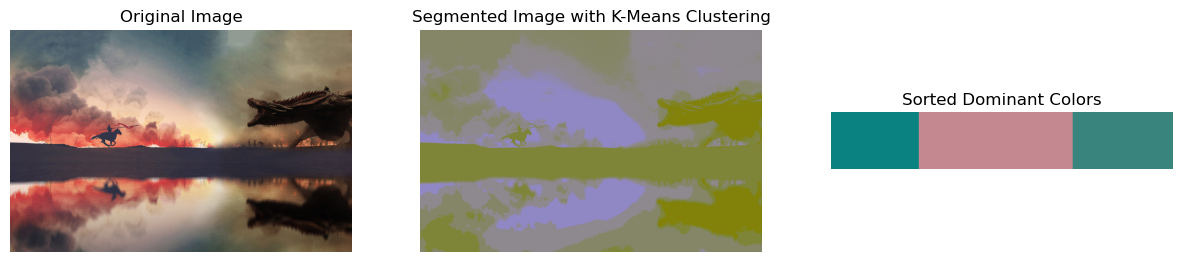

2024-10-09 17:03:31.994 python[34179:1193548] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-09 17:03:31.994 python[34179:1193548] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


: 

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to adjust contrast
def adjust_contrast(image, alpha):
    return np.clip(alpha * image, 0, 255).astype(np.uint8)

# Callback function for trackbar (does nothing, just required for trackbar to work)
def nothing(x):
    pass

# Load the image
image = cv2.imread('/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab1/images/im1.jpg')

# Check if image loaded properly
if image is None:
    print("Error: Unable to load image.")
    exit()

# Convert BGR to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Reshape image to a 2D array of pixels
pixel_values = lab_image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria and apply KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5  # Number of clusters
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to uint8
centers = np.uint8(centers)

# Count pixels in each cluster
labels_count = np.bincount(labels.flatten())

# Combine the centers and counts into a single array
dominant_colors = np.column_stack((centers, labels_count))

# Sort by pixel count (ascending)
sorted_colors = dominant_colors[dominant_colors[:, 3].argsort()]

# Normalize the pixel counts to create width proportions for plotting
max_count = np.max(sorted_colors[:, 3])
proportional_widths = (sorted_colors[:, 3] / max_count) * 600  # Scale to fit the display width

# Create an image to show the sorted dominant colors
color_image = np.zeros((100, 600, 3), dtype=np.uint8)
total_width = 0

for i in range(len(sorted_colors)):
    width = int(proportional_widths[i])  # Convert to integer for width
    color_image[:, total_width:total_width + width] = sorted_colors[i, :3]
    total_width += width

# Create a mask for the clustered pixels
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Plot the original, adjusted, and sorted dominant colors
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Segmented Image
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image with K-Means Clustering')
plt.axis('off')

# Sorted Dominant Colors
plt.subplot(1, 3, 3)
plt.imshow(color_image)
plt.title('Sorted Dominant Colors')
plt.axis('off')

plt.show()

# Create a window
cv2.namedWindow('Contrast Adjustment')

# Create trackbar to control contrast (alpha value from 1 to 3 with step of 0.01)
cv2.createTrackbar('Contrast', 'Contrast Adjustment', 100, 300, nothing)

# Loop until the user presses 'q' to exit
while True:
    # Get the current trackbar position (scale down to 1.0-3.0)
    alpha = cv2.getTrackbarPos('Contrast', 'Contrast Adjustment') / 100.0
    
    # Adjust the contrast of the original image
    adjusted_image = adjust_contrast(image, alpha)
    
    # Display the adjusted image and color clusters
    cv2.imshow('Contrast Adjustment', adjusted_image)
    cv2.imshow('Sorted Dominant Colors', color_image)

    # Exit the loop when 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup and close windows
cv2.destroyAllWindows()